Import libraries

In [257]:
import os
import PIL
from tkinter import *
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image as PILImage, ImageDraw, ImageTk

Load & prepare the dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=load_data()

Data Info and preprocess

In [202]:
x_train.shape

(60000, 28, 28)

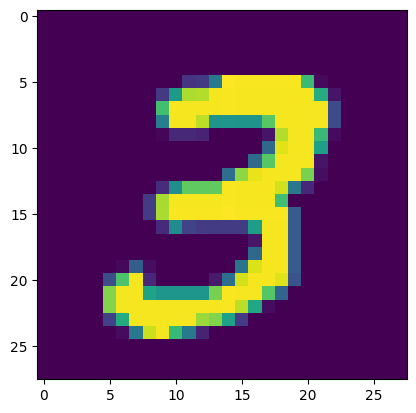

In [203]:
plt.imshow(x_train[7])
plt.show()

In [204]:
x_train=x_train/255.0
x_test=x_test/255.0

In [205]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

CNN model

In [252]:
model=Sequential()

In [253]:
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))

In [254]:
model.add(MaxPooling2D(2,2))

In [255]:
model.add(Flatten())

In [256]:
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [211]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Fitting the model to the dataset

In [212]:
model.fit(x_train,y_train,batch_size=32, epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9581 - loss: 0.1389 - val_accuracy: 0.9748 - val_loss: 0.0733
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9856 - loss: 0.0467 - val_accuracy: 0.9849 - val_loss: 0.0422
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9849 - val_loss: 0.0419
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9887 - val_loss: 0.0392
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9960 - loss: 0.0121 - val_accuracy: 0.9854 - val_loss: 0.0494
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9970 - loss: 0.0087 - val_accuracy: 0.9876 - val_loss: 0.0432
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9977 - loss: 0.0069 - val_accuracy: 0.9858 - val_loss: 0.0553
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9980 -

In [215]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,159,520 (15.87 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,773,014 (10.58 MB)

Save the model

In [217]:
model_json = model.to_json()

with open("CNN_DigitHandWrittenCharacterRecognition.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("CNN_DigitHandWrittenCharacterRecognition.weights.h5")


Data Evalutaion

In [218]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_loss,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9880 - loss: 0.1170
0.11697929352521896 0.9879999756813049


In [219]:
pred=model.predict(x_test[4].reshape(1,28,28,1))
print("index",pred.argmax())
print("acctuall_digit",y_test[4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
index 4
acctuall_digit 4


User interface

In [220]:
def create_new_image():
    width = 256
    height = 256
    center = height // 2
    white = (255, 255, 255)
    green = (0, 128, 0)
    
    def save():
        filename = 'E:/Project/Course Project/Digit/digit.jpg'
        image.save(filename)
        
    def paint(event):
        x1, y1 = (event.x - 8), (event.y - 8)
        x2, y2 = (event.x + 8), (event.y + 8)
        cv.create_oval(x1, y1, x2, y2, fill='white', outline='white')
        draw.ellipse([x1, y1, x2, y2], fill=255)
        
    root = Tk()
    
    cv = Canvas(root, width = width, height = height, bg = 'black')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), 0)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    root.mainloop()

Prediction

In [248]:
def determine_character(res):
    if res == 0:
        print('prediction : 0')
    elif res == 1:
        print('prediction : 1')
    elif res == 2:
        print('prediction : 2')
    elif res == 3:
        print('prediction : 3')
    elif res == 4:
        print('prediction : 4')
    elif res == 5:
        print('prediction : 5')
    elif res == 6:
        print('prediction : 6')
    elif res == 7:
        print('prediction : 7')
    elif res == 8:
        print('prediction : 8') 
    elif res == 9:
        print('prediction : 9')   
    else:
        print('prediction : not predicted')

In [222]:
def preprocess_digit(path, size=28):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)

    coords = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(coords)
    img = img[y:y+h, x:x+w]

    # maintain aspect ratio
    h_ratio = size / h
    w_ratio = size / w
    ratio = min(h_ratio, w_ratio)
    new_w = int(w * ratio)
    new_h = int(h * ratio)
    img = cv2.resize(img, (new_w, new_h))

    # create blank canvas & center
    canvas = np.zeros((size, size), dtype=np.uint8)
    x_offset = (size - new_w)//2
    y_offset = (size - new_h)//2
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = img

    canvas = canvas / 255.0
    canvas = np.expand_dims(canvas, axis=(0, -1))  # (1,28,28,1)
    return canvas

In [223]:
def single_prediction(path):
    test_img_arr = preprocess_digit(path)
    prediction = model.predict(test_img_arr)
    result = np.argmax(prediction, axis=1)
    determine_character(result[0])


In [224]:
def delete_created_image():
    os.remove('E:/Project/Course Project/Digit/digit.jpg')

In [225]:
def draw_n_guess_the_character():
    create_new_image()  # Draw & save digit.jpg

    # preprocess + predict
    single_prediction('E:/Project/Course Project/Digit/digit.jpg')

    # Optionally show
    img = cv2.imread('E:/Project/Course Project/Digit/digit.jpg', cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()   
    delete_created_image()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
prediction : 9


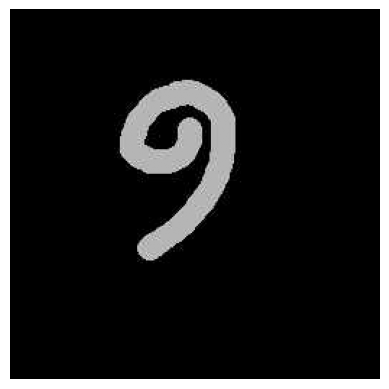

In [249]:
draw_n_guess_the_character()